# CPE 646 Pattern Recognition Final Project
## Modulation Classification Using CNNs
### Model 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, os.path

from sklearn.model_selection import train_test_split
from PIL import Image

In [2]:
image_folder = r'./drive/MyDrive/CPE646/FiveHund/'
num_images = len([name for name in os.listdir(image_folder) if os.path.isfile(os.path.join(image_folder, name))])

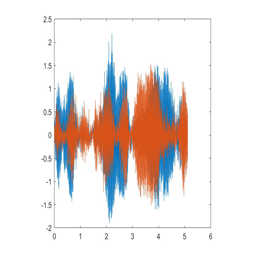

In [3]:
# Display example image
image = Image.open(os.path.join(image_folder, 'DSB-AM100.jpg'))
image.resize((256, 256))

In [4]:
# Load images into memory as pixel values
images = []
for i in range(num_images):
    file = os.listdir(image_folder)
    image_path = os.path.join(image_folder, file[i])
    image = Image.open(image_path)
    image = image.resize((256, 256))    # resize to make smaller
    image = np.array(image)
    images.append(image)

In [5]:
images = np.array(images)    # convert list to array
images.shape

(1000, 256, 256, 3)

In [6]:
# Create labels
images_per_class = int(images.shape[0] / 2)
zeros = np.zeros((images_per_class, 1)).astype(int)
ones = np.ones((images_per_class, 1)).astype(int)
labels = np.concatenate((zeros, ones))    # first half are zeros, second half are ones

In [7]:
# Normalize pixel values to between 0 and 1
images = images / 255

In [8]:
# Split data into training and test sets
(X_train, X_test, y_train, y_test) = train_test_split(images, labels, test_size = .1, shuffle = True)

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.losses import SparseCategoricalCrossentropy

In [10]:
# Create model
model = Sequential()                                                                # define sequential model

# CNN layers
model.add(Conv2D(16, (3, 3), activation = 'relu', input_shape = (256, 256, 3)))     # convolution
model.add(MaxPooling2D(pool_size = (2,2)))                                          # pooling
model.add(BatchNormalization(axis = -1))                                            # batch normalization

model.add(Conv2D(32, (3, 3), activation = 'relu'))                                  # convolution
model.add(MaxPooling2D(pool_size = (2,2)))                                          # pooling
model.add(BatchNormalization(axis = -1))                                            # batch normalization

model.add(Conv2D(64,(3, 3), activation = 'relu'))                                   # convolution
model.add(MaxPooling2D(pool_size = (2,2)))                                          # pooling
model.add(BatchNormalization(axis = -1))                                            # batch normalization

model.add(Conv2D(64, (3, 3), activation = 'relu'))                                  # convolution
model.add(MaxPooling2D(pool_size = (2,2)))                                          # pooling
model.add(BatchNormalization(axis = -1))                                            # batch normalization

model.add(Flatten())                                                                # flatten for fully connected layer

# Fully connected layers
model.add(Dense(512, activation = 'relu'))                                          # dense layer
model.add(Dropout(0.3))                                                             # dropout
model.add(Dense(1, activation = 'sigmoid'))                                         # dense layer (2 classes - binary)

In [11]:
model.compile(loss = 'binary_crossentropy', 
              optimizer = 'adam', 
              metrics = ['accuracy'])

In [12]:
history = model.fit(X_train, y_train, epochs=10, validation_split = 0.1)

Epoch 1/10
26/26 [==============================] - 5s 85ms/step - loss: 1.8911 - accuracy: 0.8531 - val_loss: 2.0321 - val_accuracy: 0.5222
Epoch 2/10
26/26 [==============================] - 1s 47ms/step - loss: 0.2817 - accuracy: 0.9235 - val_loss: 2.1082 - val_accuracy: 0.5222
Epoch 3/10
26/26 [==============================] - 1s 47ms/step - loss: 0.1778 - accuracy: 0.9432 - val_loss: 1.9175 - val_accuracy: 0.5222
Epoch 4/10
26/26 [==============================] - 1s 47ms/step - loss: 0.1425 - accuracy: 0.9494 - val_loss: 2.0315 - val_accuracy: 0.5222
Epoch 5/10
26/26 [==============================] - 1s 47ms/step - loss: 0.1083 - accuracy: 0.9630 - val_loss: 1.1034 - val_accuracy: 0.5222
Epoch 6/10
26/26 [==============================] - 1s 47ms/step - loss: 0.0634 - accuracy: 0.9753 - val_loss: 1.2699 - val_accuracy: 0.5222
Epoch 7/10
26/26 [==============================] - 1s 47ms/step - loss: 0.0590 - accuracy: 0.9864 - val_loss: 0.8008 - val_accuracy: 0.5333
Epoch 8/10
26

As can be seen above, the training accuracy and validation accuracy increase over time, which is what we want. If the validation accuracy started to decrease we would be at risk of overfitting, however this does not occur him after 10 epochs.

In [13]:
# Get training loss and accuracy
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 65ms/step - loss: 0.2498 - accuracy: 0.9400


[0.249817356467247, 0.9399999976158142]

As can be seen above, the model is able to do a very good job at classifying the 2 modulation types, achieving a **test accuracy of 94%**.

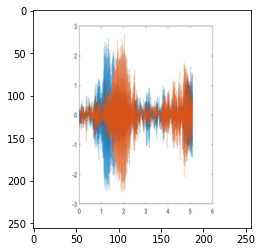

In [14]:
# Plot an example image from the test set
plt.imshow(X_test[8])

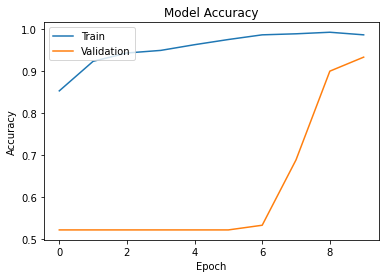

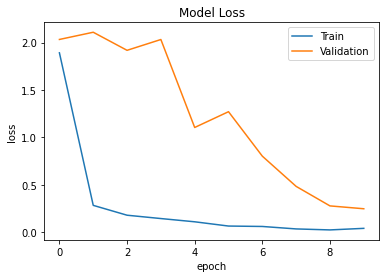

In [20]:
# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()